In [1]:
# importing all the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline # off the shelf cubic spline

# Using these for setting up plotting parameters
width = 3.4 
height = width / 1.618 # Golden ratio for plotting some nice figures

plt.rcParams.update({
    "text.usetex": True,           # Uses LaTeX to render text
    "font.family": "serif",        # Matches REVTeX serif font
    "font.serif": ["Computer Modern Roman"],
    "font.size": 10,               # Matches document font size
    "axes.labelsize": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": (width, height),
    "figure.autolayout": True,
})

I start with defining the linear interpolation function. This function will be called whenever I need to interpolate a function using the piecewise linear interpolation.

By basing the loop inside the function on the range len(x) - 1, the function only  looks at intervals between existing data points and thus does not extrapolate

In [2]:
def linear_interpolate(x,y,N):
    m_vals = np.zeros(len(x)-1)  # By basing the loop range on len(x) - 1, the function only  looks at intervals between existing data points
    y_int = [] # These are the y points for the interpolation for each g_j     
    x_int = [] # This array will store the sequential points for the interpolation that we need in x axis  
                         
    for j in range(0,len(m_vals)): 
        dx = (x[j+1] - x[j])/N      # spacing for the "N" resolution for interpolation
        m_vals[j] = (y[j+1] - y[j])/(x[j+1] - x[j]) # Slope for a g_j'th line segment
        
        for i in range(0,N):
            current_x = x[j] + i * dx
            y_data = y[j] + m_vals[j] * (current_x - x[j])
            y_int.append(y_data)
            x_int.append(current_x)
    return np.array(x_int),np.array(y_int) 


### Problem 1. Linear and cubic spline interpolation for the provided data

In [3]:
text_doc = pd.read_csv('HW01_data.txt',sep = r'\s+')
x = text_doc['x'].values # spits out the x values from the data set given to us
y = text_doc['y'].values

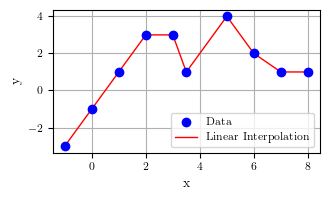

In [4]:
x_interpolate, y_interpolate = linear_interpolate(x,y,10)

# Plot of the original points from the data set provided to us. 
plt.scatter(x, y, color='blue', label='Data', zorder=5)

# Plot the interpolation 
plt.plot(x_interpolate, y_interpolate, color='red', label='Linear Interpolation', linewidth=1)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend()
plt.grid()
plt.savefig("2_linear_interpolation.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)

In [68]:
cubic_spline = CubicSpline(x,y)
x_new = np.linspace(-1, 8, 80)
y_new = cubic_spline(x_new) # This evaluates the cubic spline at the points where I want the interpolation 

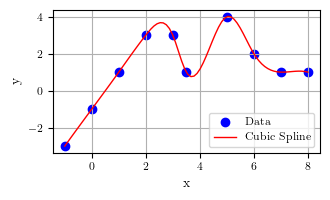

In [70]:
plt.scatter(x,y, label='Data', color='blue')
plt.plot(x_new,y_new,color='red', label='Cubic Spline', linewidth=1)

plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend()
plt.grid()
plt.savefig("2b_cubic_spline.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)

### Problem 2. Sampling the function $y = \sin(\frac{\pi x}{2}) + \frac{x}{2} $ and interpolating the function using both linear and cubic spline.

In [5]:
def sampling_function(x_vals): # this function can be used to sample the y points 
    return np.sin(np.pi/2*x_vals) + x_vals/2

In [6]:
x_sampling = np.arange(0,11,1) # sampling equally spaced 10 values from 0 to 10
y_sampling = sampling_function(x_sampling)
x_linear_prob_3, y_linear_prob_3 = linear_interpolate(x_sampling,y_sampling,10)

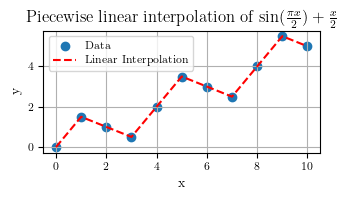

In [7]:
plt.scatter(x_sampling,y_sampling, label = 'Data')
plt.plot(x_linear_prob_3,y_linear_prob_3,linestyle = 'dashed',color = 'red',label = 'Linear Interpolation')

plt.title(r'Piecewise linear interpolation of $\sin(\frac{\pi x}{2}) + \frac{x}{2}$')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend()
plt.grid()
plt.show()

In [8]:
cubic_spline_prob_3 = CubicSpline(x_sampling,y_sampling)
x_cubic_prob_3 = np.arange(0,10,0.1)
y_cubic_prob_3 = cubic_spline_prob_3(x_cubic_prob_3)

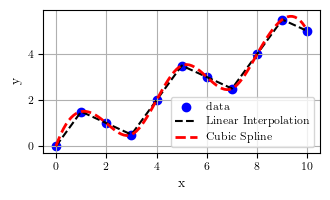

In [9]:

plt.scatter(x_sampling,y_sampling,label = 'data',color = 'blue')
plt.plot(x_linear_prob_3,y_linear_prob_3,'--', label = 'Linear Interpolation',color = 'black')
plt.plot(x_cubic_prob_3,y_cubic_prob_3,'--',linewidth = 2,color = 'r',label = 'Cubic Spline')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend()
plt.grid()
plt.savefig("3a_interpolation.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)

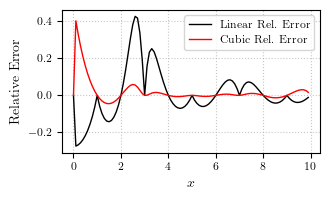

In [13]:
x_lin, y_lin = linear_interpolate(x_sampling, y_sampling, 10) # interpolation with 10x resolution
y_cub = cubic_spline_prob_3(x_lin) # cubic spline at the same x points

# True values
y_true = sampling_function(x_lin)

#  Relative Error
rel_error_linear = (y_lin - y_true) / (y_true + 1e-15)
rel_error_cubic = (y_cub - y_true) / (y_true + 1e-15)

plt.figure() 
plt.plot(x_lin, rel_error_linear, label='Linear Rel. Error', color='black', lw=1)
plt.plot(x_lin, rel_error_cubic, label='Cubic Rel. Error', color='red', lw=1)
plt.xlabel(r'$x$')
plt.ylabel(r'Relative Error')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.savefig("3b_relative_error.pdf")
plt.show()